In [52]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

In [53]:
df = pd.read_csv('Prem_2021_2022.csv')

Text(0, 0.5, 'Points Achieved')

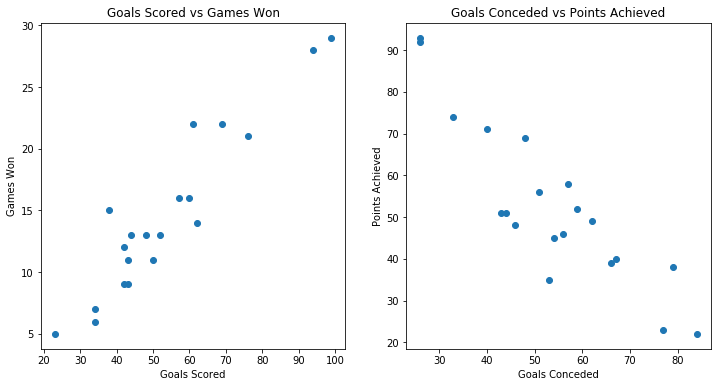

In [54]:
fig, axes = plt.subplots(1, 2, figsize=(12,6))
axes[0].scatter(df['GoalsFor'], df['Won'])
axes[1].scatter(df['GoalsAgainst'], df['Points'])
axes[0].set_title('Goals Scored vs Games Won')
axes[1].set_title('Goals Conceded vs Points Achieved')
axes[0].set_xlabel('Goals Scored')
axes[0].set_ylabel('Games Won')
axes[1].set_xlabel('Goals Conceded')
axes[1].set_ylabel('Points Achieved')

In [78]:
slopeGF, interceptGF, r_valueGF, p_valueGF, std_errGF = stats.linregress(df['GoalsFor'], df['Won'])
slopeGC, interceptGC, r_valueGC, p_valueGC, std_errGC = stats.linregress(df['GoalsAgainst'], df['Points'])

GF_range = np.arange(df['GoalsFor'].min(), df['GoalsFor'].max()+1)
GC_range = np.arange(df['GoalsAgainst'].min(), df['GoalsAgainst'].max()+1)

GF_predictions = slopeGF*df['GoalsFor']+interceptGF
GF_residuals = df['Won'] - GF_predictions
GC_predictions = slopeGC*df['GoalsAgainst']+interceptGC
GC_residuals = df['Points'] - GC_predictions

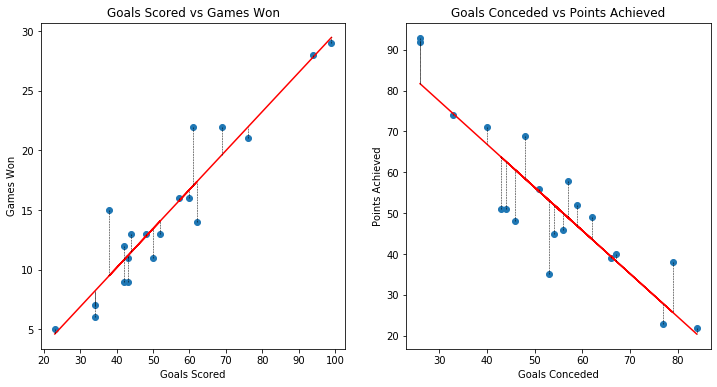

In [83]:
fig, axes = plt.subplots(1, 2, figsize=(12,6))
axes[0].scatter(df['GoalsFor'], df['Won'])
axes[1].scatter(df['GoalsAgainst'], df['Points'])
axes[0].set_title('Goals Scored vs Games Won')
axes[1].set_title('Goals Conceded vs Points Achieved')
axes[0].set_xlabel('Goals Scored')
axes[0].set_ylabel('Games Won')
axes[1].set_xlabel('Goals Conceded')
axes[1].set_ylabel('Points Achieved')
axes[0].plot(df['GoalsFor'], GF_predictions, color='red')
for x, y, res in zip(df['GoalsFor'], df['Won'], GF_residuals):
    axes[0].plot([x, x], [y, y - res], 'k--', lw=0.5)
axes[1].plot(df['GoalsAgainst'], GC_predictions, color='red')
for x, y, res in zip(df['GoalsAgainst'], df['Points'], GC_residuals):
    axes[1].plot([x, x], [y, y - res], 'k--', lw=0.5)

In [57]:
df2 = pd.read_csv('Prem_2022_2023.csv')

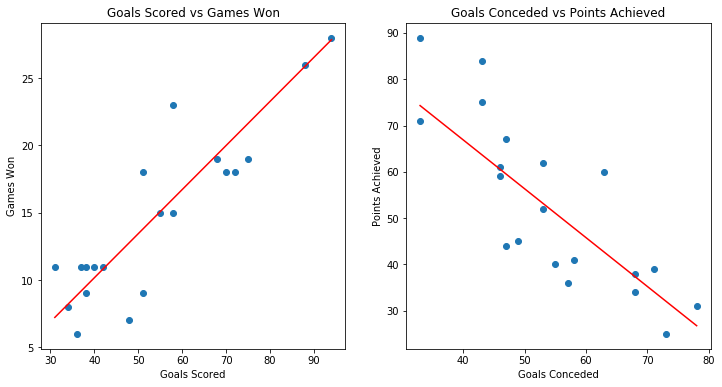

In [58]:
fig, axes = plt.subplots(1, 2, figsize=(12,6))
axes[0].scatter(df2['GoalsFor'], df2['Won'])
axes[1].scatter(df2['GoalsAgainst'], df2['Points'])
axes[0].set_title('Goals Scored vs Games Won')
axes[1].set_title('Goals Conceded vs Points Achieved')
axes[0].set_xlabel('Goals Scored')
axes[0].set_ylabel('Games Won')
axes[1].set_xlabel('Goals Conceded')
axes[1].set_ylabel('Points Achieved')

GF_range = np.arange(df2['GoalsFor'].min(), df2['GoalsFor'].max()+1)
GC_range = np.arange(df2['GoalsAgainst'].min(), df2['GoalsAgainst'].max()+1)

GF_predictions = slopeGF*GF_range+interceptGF
GC_predictions = slopeGC*GC_range+interceptGC

axes[0].plot(GF_range, GF_predictions, color='red')
axes[1].plot(GC_range, GC_predictions, color='red')

In [59]:
man_city_goals_for = 94
print(man_city_goals_for*slopeGF+interceptGF)

27.83817159067995


In [60]:
man_city_goals_conceded = 33
print(man_city_goals_conceded*slopeGC+interceptGC)

74.30325238204742


In [61]:
df2['GoalsFor'].max()

94

In [65]:
residuals = df2['Won'] - slopeGF*df2['GoalsFor']+interceptGF

In [66]:
residuals

0     -5.689054
1     -5.725419
2      1.092755
3     -6.179969
4     -8.470877
5     -8.489059
6     -1.616337
7     -7.834514
8     -6.907245
9     -5.925427
10    -5.016340
11    -4.361795
12    -2.070888
13    -5.670885
14    -4.034523
15    -6.361795
16    -6.052705
17   -10.616337
18   -11.634520
19    -8.707250
dtype: float64

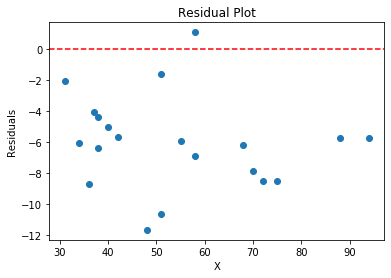

In [67]:
plt.scatter(df2['GoalsFor'], residuals)
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0 for reference
plt.xlabel('X')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

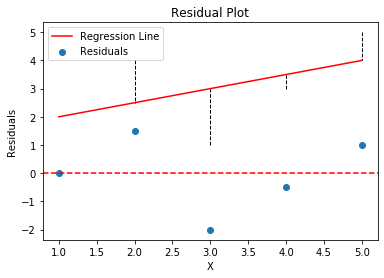

In [68]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Sample data
X = np.array([1, 2, 3, 4, 5])
Y = np.array([2, 4, 1, 3, 5])

# Perform linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(X, Y)

# Calculate predicted values and residuals
predicted_values = slope * X + intercept
residuals = Y - predicted_values

# Create a scatter plot of the residuals
plt.scatter(X, residuals, label="Residuals")

# Plot the regression line
plt.plot(X, predicted_values, color='red', label="Regression Line")

# Add dotted lines connecting points to the regression line
for x, y, res in zip(X, Y, residuals):
    plt.plot([x, x], [y, y - res], 'k--', lw=1)

plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('X')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.legend()
plt.show()


Text(0.5, 1.0, 'Linear Regression and Residuals')

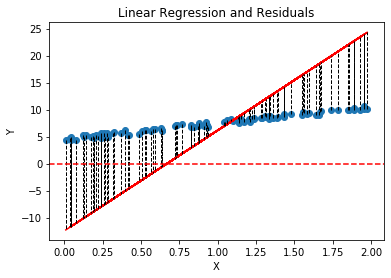

In [72]:
import numpy as np
import matplotlib.pyplot as plt

# Generate sample data
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
Y = 4 + 3 * X + np.random.rand(100, 1)

# Initialize the parameters (slope and intercept)
theta0 = np.random.rand()
theta1 = np.random.rand()

# Set hyperparameters
learning_rate = 0.1
num_iterations = 100

# Lists to store data for plotting
theta0_history = [theta0]
theta1_history = [theta1]
error_history = []

# Perform gradient descent
for iteration in range(num_iterations):
    gradients = -(2 / len(X)) * np.sum(X * (Y - (theta0 + theta1 * X)))
    theta0 -= learning_rate * gradients
    gradients = -(2 / len(X)) * np.sum(Y - (theta0 + theta1 * X))
    theta1 -= learning_rate * gradients

    # Calculate the mean squared error for this iteration
    predicted_values = theta0 + theta1 * X
    mean_squared_error = np.mean((Y - predicted_values) ** 2)
    error_history.append(mean_squared_error)
    
    theta0_history.append(theta0)
    theta1_history.append(theta1)

# Plot the data points
plt.scatter(X, Y, label='Data Points')

# Plot the regression line
plt.plot(X, theta0 + theta1 * X, color='red', label='Regression Line')

# Plot the residuals
for x, y in zip(X, Y):
    plt.plot([x, x], [y, theta0 + theta1 * x], 'k--', lw=1)

plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Regression and Residuals')


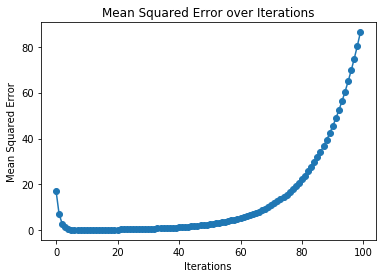

In [73]:


# Create a subplot for squared errors
plt.figure()
plt.plot(range(num_iterations), error_history, marker='o')
plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error')
plt.title('Mean Squared Error over Iterations')

plt.show()

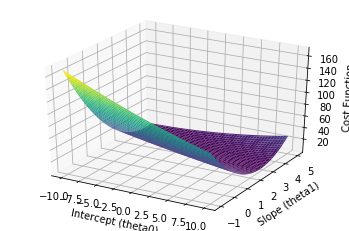

In [84]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Generate some sample data
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
Y = 4 + 3 * X + np.random.rand(100, 1)

# Define the cost function
def cost_function(X, Y, theta0, theta1):
    m = len(X)
    predicted_values = theta0 + theta1 * X
    squared_errors = (predicted_values - Y) ** 2
    return (1 / (2 * m)) * np.sum(squared_errors)

# Create a grid of slope (theta1) and intercept (theta0) values
theta0_values = np.linspace(-10, 10, 100)
theta1_values = np.linspace(-1, 5, 100)
cost_values = np.zeros((len(theta0_values), len(theta1_values)))

for i, theta0 in enumerate(theta0_values):
    for j, theta1 in enumerate(theta1_values):
        cost_values[i, j] = cost_function(X, Y, theta0, theta1)

# Create a contour plot
theta0_grid, theta1_grid = np.meshgrid(theta0_values, theta1_values)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(theta0_grid, theta1_grid, cost_values, cmap='viridis')
ax.set_xlabel('Intercept (theta0)')
ax.set_ylabel('Slope (theta1)')
ax.set_zlabel('Cost Function')

plt.show()


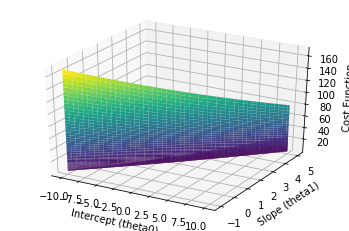

In [93]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Generate some sample data
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
Y = 4 + 3 * X + np.random.rand(100, 1)

# Define the cost function
def cost_function(X, Y, theta0, theta1):
    m = len(X)
    predicted_values = theta0 + theta1 * X
    squared_errors = (predicted_values - Y) ** 2
    return (1 / (2 * m)) * np.sum(squared_errors)

# Create a grid of slope (theta1) and intercept (theta0) values
theta0_values = np.linspace(-10, 10, 100)
theta1_values = np.linspace(-1, 5, 100)
cost_values = np.zeros((len(theta0_values), len(theta1_values)))

for i, theta0 in enumerate(theta0_values):
    for j, theta1 in enumerate(theta1_values):
        cost_values[i, j] = cost_function(X, Y, theta0, theta1)

# Create an interactive 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(theta0_values, theta1_values, cost_values, cmap='viridis')
ax.set_xlabel('Intercept (theta0)')
ax.set_ylabel('Slope (theta1)')
ax.set_zlabel('Cost Function')

plt.show()


In [92]:
%matplotlib inline